# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Lectura de dataset
df = pd.read_csv('dataset_SCL.csv')

In [3]:
#Cantida de filas y columnas del dataset
df.shape

(68206, 18)

In [4]:
#Informacion asociada a variables disponibles en el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<AxesSubplot:>

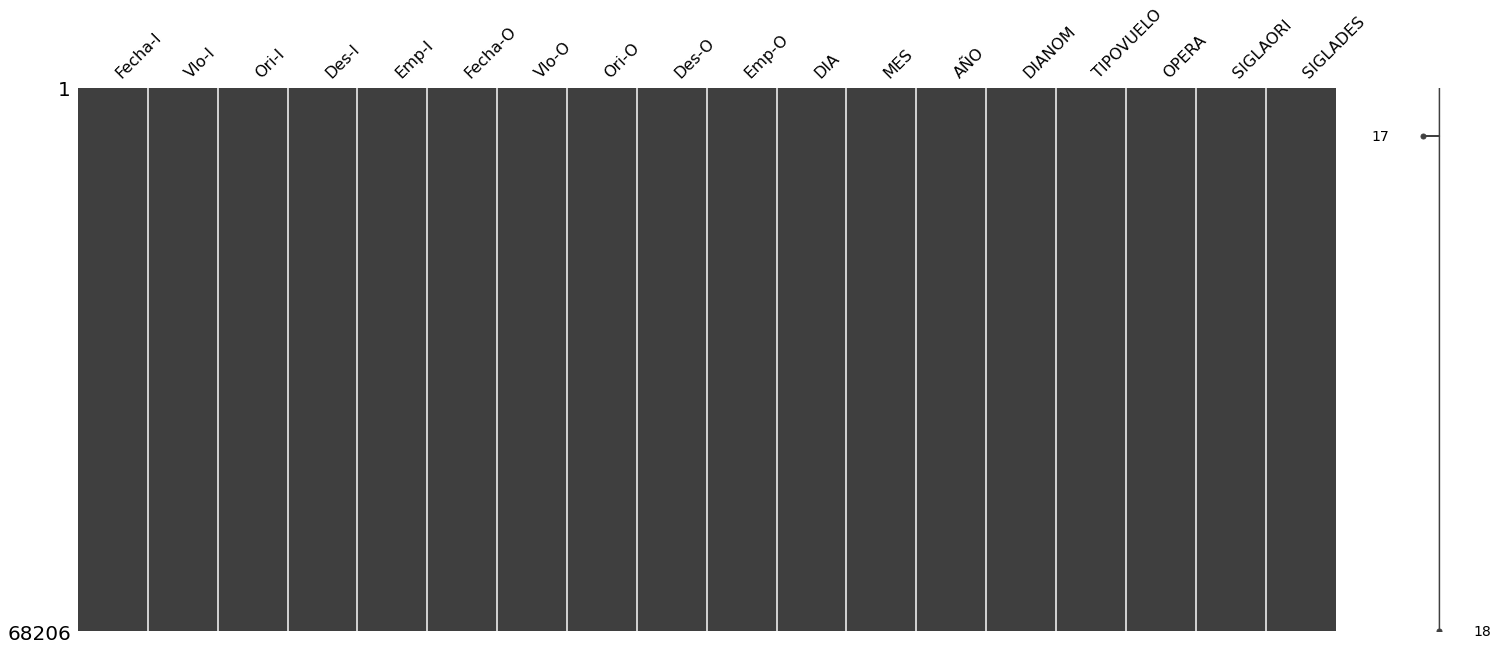

In [5]:
#Revisando datos faltantes
msng.matrix(df)

In [6]:
#Estadisticos variables numericas (Me suenan mas descriptivas)
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [7]:
#Ejemplos del dataset (5)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

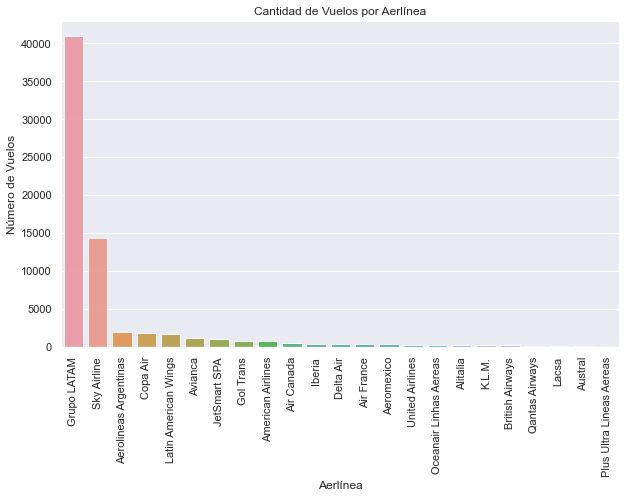

In [8]:
#Frecuencia de vuelos por aerolinea
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

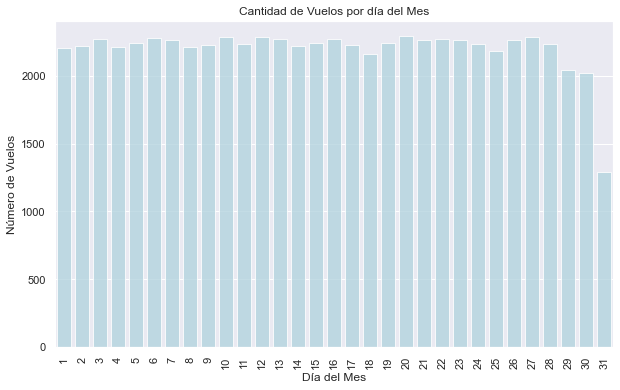

In [9]:
#Frecuencia de vuelos por dia del mes
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

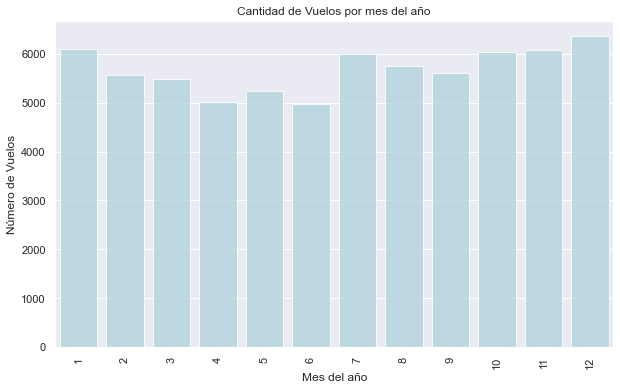

In [10]:
#Frecuencia de vuelos por meses del año
vuelos_mes = df['MES'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por mes del año')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Mes del año', fontsize=12)
plt.xticks(rotation=90)
plt.show()

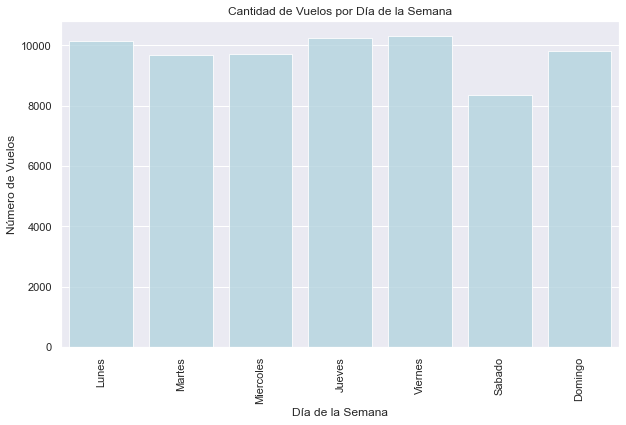

In [11]:
#Frecuencia de vuelo por dia de la semana
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
plt.figure(figsize = (10,6))
sns.barplot(x=dias, y=valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

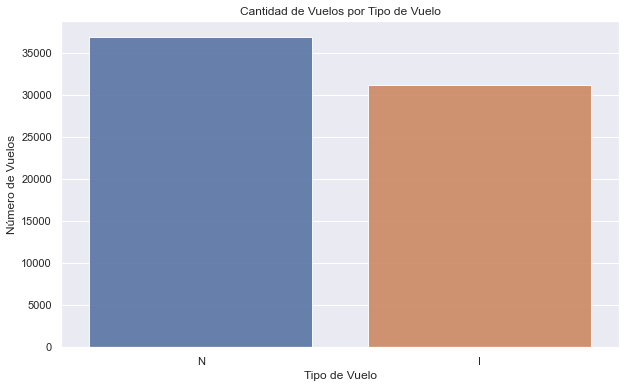

In [12]:
#Frecuencia de vuelo por tipo
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10,6))
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

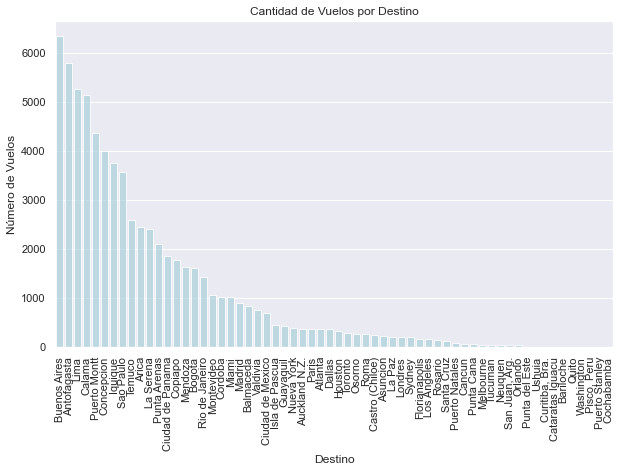

In [13]:
#Frecuencia de vuelo por destino
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10,6))
sns.barplot(x=vuelos.index, y=vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [14]:
#Funcion para crear columna con temporada alta y baja
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [15]:
#Creando columna de temporada alta
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [16]:
#Distribucion de temporada
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

In [17]:
# Calculo normalizado
df['temporada_alta'].value_counts(normalize=True)

0    0.676979
1    0.323021
Name: temporada_alta, dtype: float64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [18]:
#Funcion para calcular minutos de diferencia entre la fecha esperada y la fecha real de operacion.
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [19]:
#Creacion del campo con diferencia en minutos
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [20]:
#Creacion de label, se considera atraso cuando los minutos de diferencia sea mayor a 15
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [21]:
#Distribucion del label
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [22]:
#Distribucion normalizada
df['atraso_15'].value_counts(normalize=True)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [23]:
#Funcion para crear periodo del dia
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [24]:
#Creacion de la variable
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [25]:
#Crear archivo synthetic features en csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [26]:
#Funcion para calcular tasa de atraso para una columna especifica
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [27]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
...,...
Quito,1.00
Washington,0.00
"Pisco, Peru",0.00
Puerto Stanley,1.00


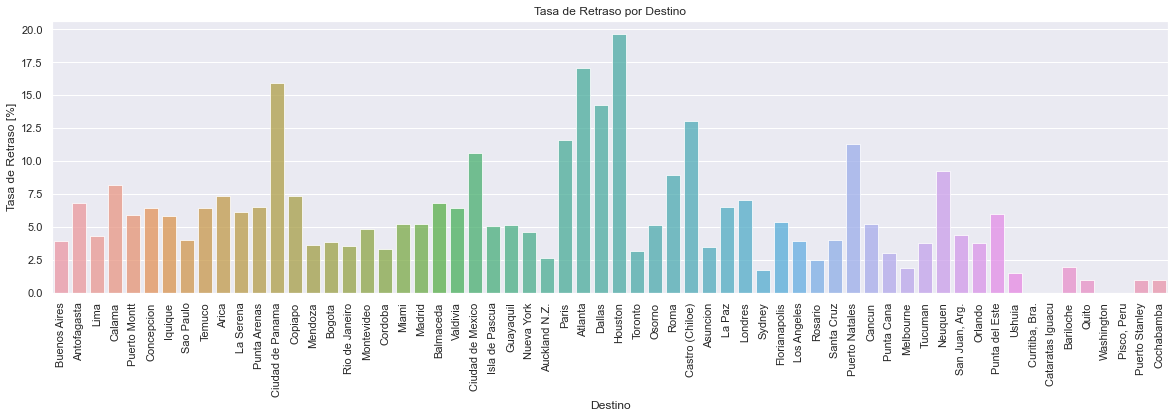

In [28]:
#Tasa de atraso por destino
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=df['SIGLADES'].value_counts().index, y=tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Validando lo anterior

In [29]:
#Validando funcion anterior, no me calza el calculo. En mi opinion hay un error en la formula para obtener la tasa.
def calculate_frequency(df, column_name, delay_column_name):
    
    # Group the DataFrame by the Destination column and calculate the frequency of delays for each group
    grouped_df = df.groupby(column_name)[delay_column_name].value_counts(normalize=True)
    
    # Convert the grouped DataFrame to a dictionary
    frequency = pd.DataFrame(grouped_df)
    frequency = frequency.rename(columns={'atraso_15':'Tasa (%)'}).reset_index()
    frequency = frequency[frequency['atraso_15']==1]
    frequency = frequency[[column_name,'Tasa (%)']]

    #Tasa de atraso por destino
    plt.figure(figsize = (20,5))
    sns.set(style="darkgrid")
    sns.barplot(x=frequency[column_name], y=frequency['Tasa (%)'], alpha = 0.75)
    plt.title(f'Tasa de Retraso por {column_name}')
    plt.ylabel('Tasa de Retraso [%]', fontsize=12)
    plt.xlabel({column_name}, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    
    return frequency

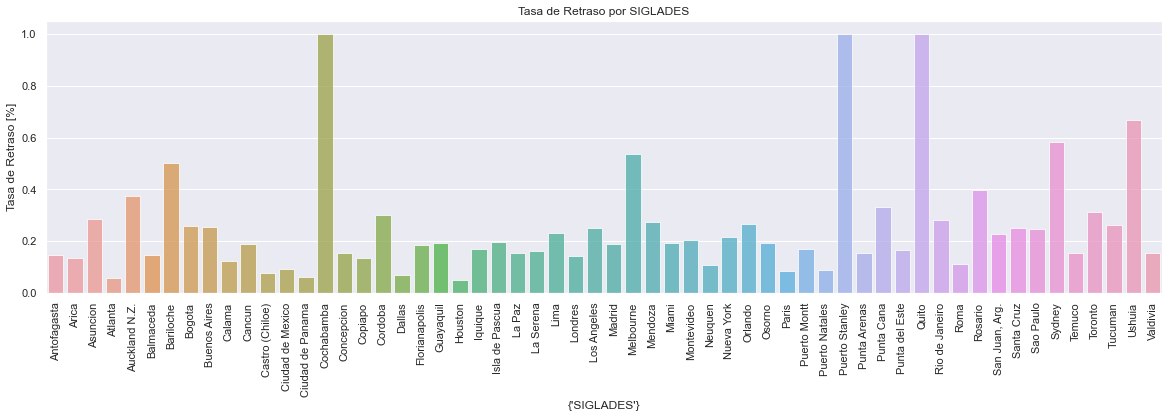

,SIGLADES,Tasa (%)
1,Antofagasta,0.146388
3,Arica,0.135468
5,Asuncion,0.284483
7,Atlanta,0.058659
9,Auckland N.Z.,0.373961


In [30]:
tasas_destinos = calculate_frequency(df, 'SIGLADES', 'atraso_15')
tasas_destinos.head()

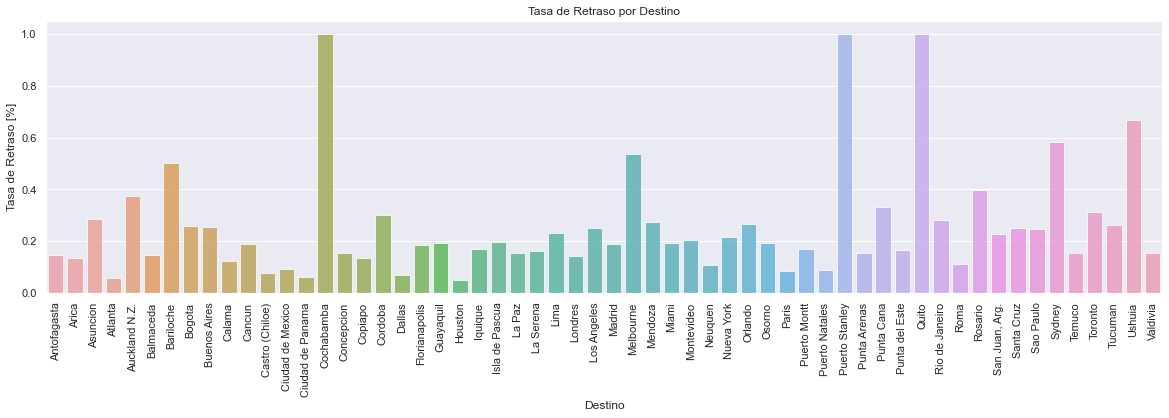

In [31]:
#Tasa de atraso por destino
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_destinos['SIGLADES'], y=tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Dado lo anterior, los siguientes calculos tambien son incorrectos.

In [33]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas.head()

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46


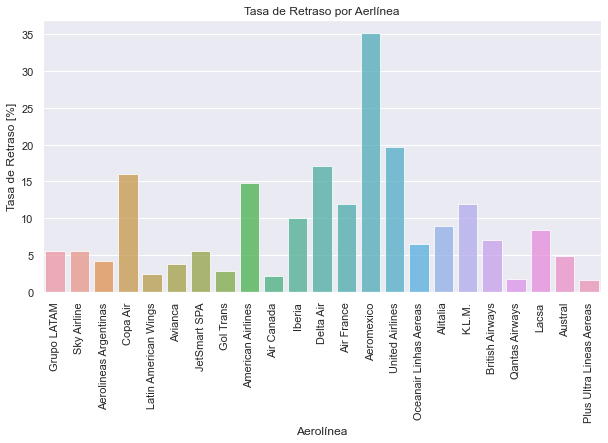

In [34]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_aerolineas_values, y=tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

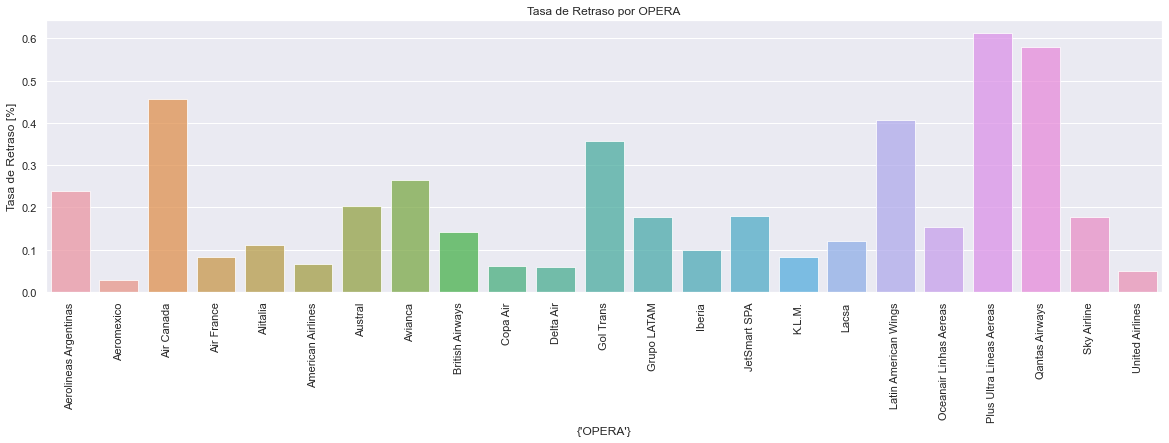

,OPERA,Tasa (%)
1,Aerolineas Argentinas,0.240123
3,Aeromexico,0.028490
5,Air Canada,0.456637
7,Air France,0.083799
9,Alitalia,0.111969
11,American Airlines,0.067371
13,Austral,0.202703
15,Avianca,0.265625
17,British Airways,0.141463
19,Copa Air,0.062703


In [35]:
#Deberia ser:
tasas_aerolineas = calculate_frequency(df, 'OPERA', 'atraso_15')
tasas_aerolineas

In [36]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,3.94
1,6.25
11,5.07
10,4.43
7,3.41
8,5.77
9,5.80
2,6.60
3,8.69
5,6.34


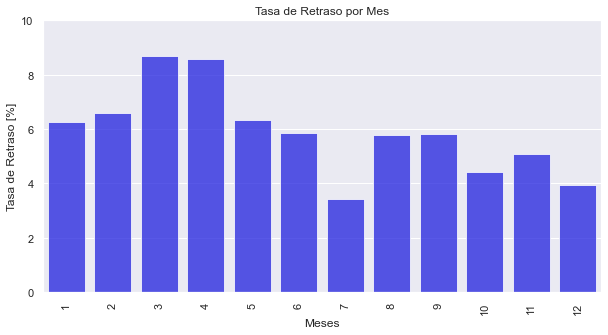

In [91]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_meses_values, y=tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

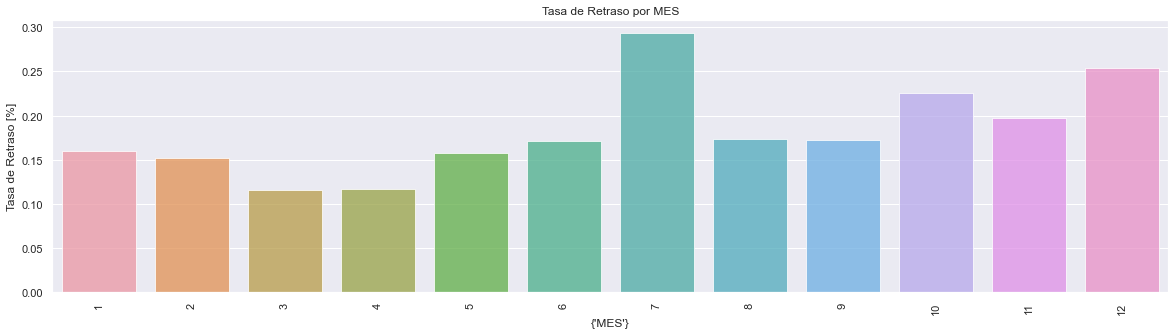

,MES,Tasa (%)
1,1,0.160118
3,2,0.151591
5,3,0.115104
7,4,0.116534
9,5,0.157824
11,6,0.171050
13,7,0.293391
15,8,0.173398
17,9,0.172371
19,10,0.225962


In [92]:
#Deberia ser:
tasas_meses = calculate_frequency(df, 'MES', 'atraso_15')
tasas_meses

In [93]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,4.50
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


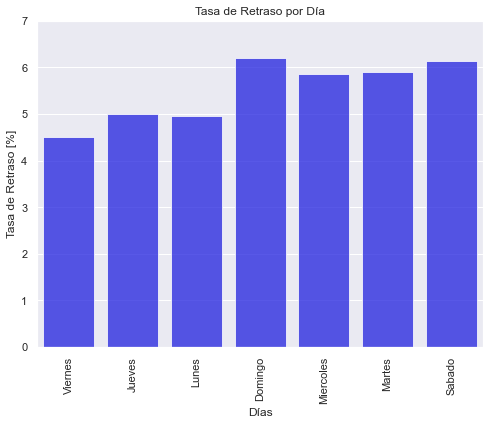

In [95]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(x=tasas_dias_values, y=tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

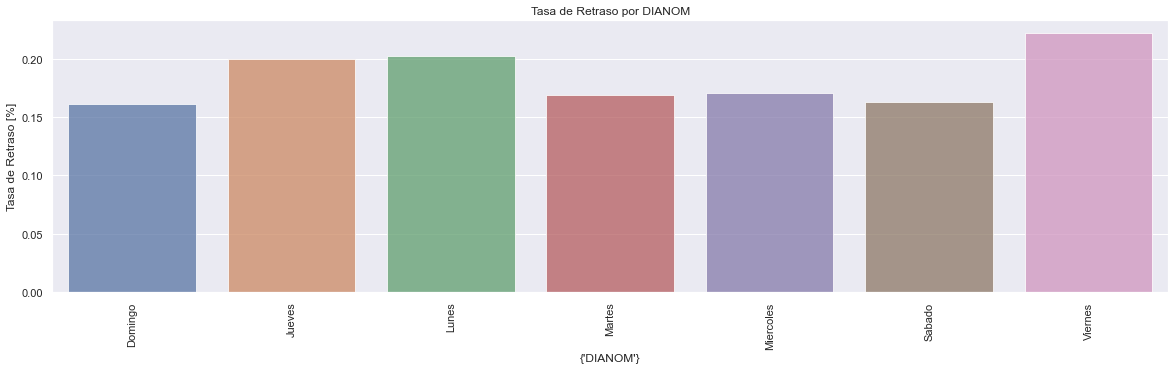

,DIANOM,Tasa (%)
1,Domingo,0.161086
3,Jueves,0.199493
5,Lunes,0.202152
7,Martes,0.169116
9,Miercoles,0.170850
11,Sabado,0.163194
13,Viernes,0.222017


In [96]:
#Deberia ser:
tasas_dias = calculate_frequency(df, 'DIANOM', 'atraso_15')
tasas_dias

In [97]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


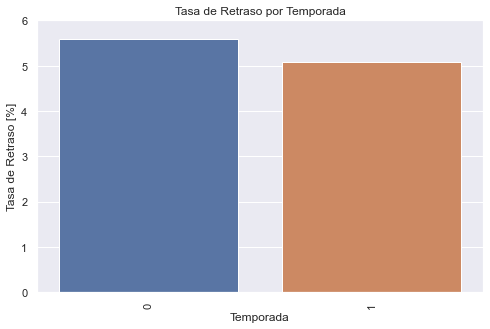

In [99]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_temporada_values, y=tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

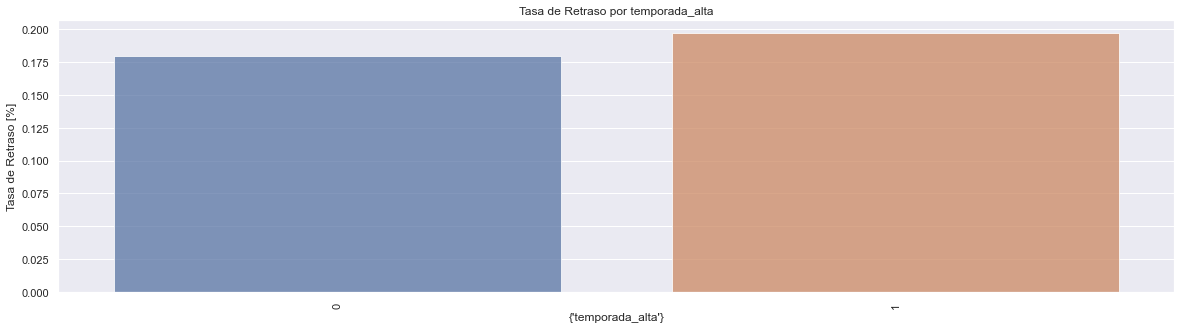

,temporada_alta,Tasa (%)
1,0,0.179300
3,1,0.196759


In [100]:
#Deberia ser:
tasas_temporada = calculate_frequency(df, 'temporada_alta', 'atraso_15')
tasas_temporada

In [101]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


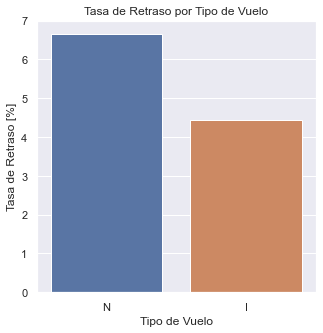

In [102]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_tipovuelo_values, y=tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

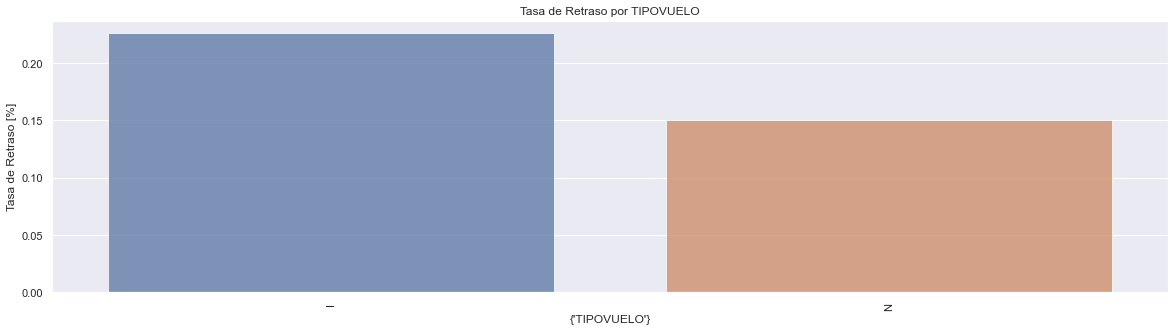

,TIPOVUELO,Tasa (%)
1,I,0.225608
3,N,0.150571


In [103]:
#Deberia ser:
tipo_vuelo = calculate_frequency(df, 'TIPOVUELO', 'atraso_15')
tipo_vuelo

In [104]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


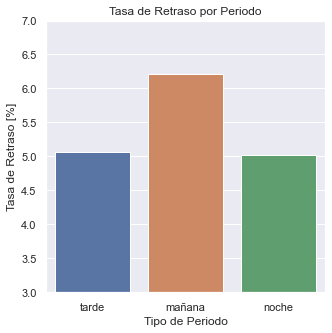

In [106]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

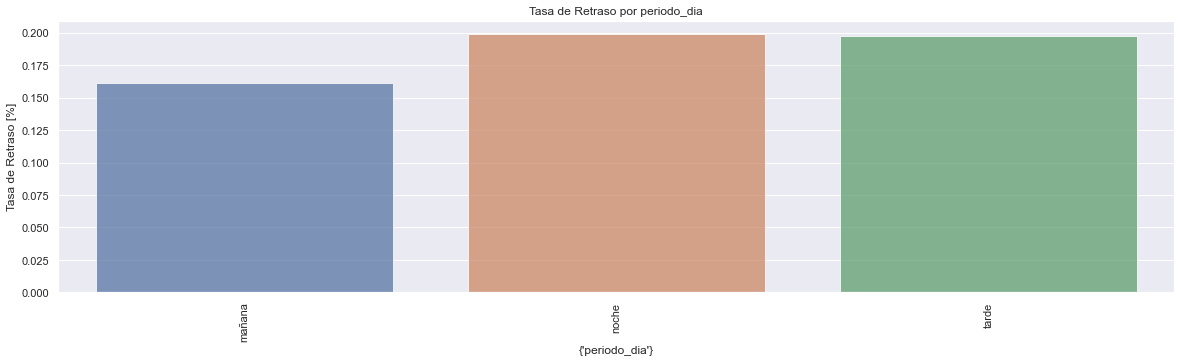

,periodo_dia,Tasa (%)
1,mañana,0.161137
3,noche,0.199250
5,tarde,0.197525


In [107]:
#Deberia ser:
tasa_periododia = calculate_frequency(df, 'periodo_dia', 'atraso_15')
tasa_periododia

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# Filtra columnas que espera que tengan poder predictivo
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

In [41]:
#Encoding variables categoricas 
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

In [42]:
#Split data 33% testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [43]:
#Resultado del split
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [44]:
#Distribucion de la clase en training
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [45]:
#Distribucion de la clase en testing
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [48]:
#Entrenando regresion logistica en set de entrenamiento
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [49]:
#Prediciendo sobre set de testing
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [50]:
#Confusion matrix sobre predicciones set de testing
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]])

In [51]:
#Reporte de performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



### Evaluando overfitting

In [52]:
#Para evaluar el overfitting, agrego reporte en training
#Reporte de performance en training
y_pred_train = model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     37189
           1       0.56      0.03      0.06      8509

    accuracy                           0.82     45698
   macro avg       0.69      0.51      0.48     45698
weighted avg       0.77      0.82      0.74     45698



In [53]:
#Utilizar validation set para comprobar performance
#Split data 33% testing
X_trainval, X_test, y_trainval, y_test = train_test_split(features, label, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.22, random_state=42)

#shapes de los conjuntos creados
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (47880, 37) (47880,)
Validation set shape: (13505, 37) (13505,)
Testing set shape: (6821, 37) (6821,)


In [54]:
#entrenando
model = logReg.fit(X_train, y_train)
#Prediciendo sobre set de testing
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [55]:
#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))


Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     39019
           1       0.55      0.03      0.05      8861

    accuracy                           0.82     47880
   macro avg       0.68      0.51      0.48     47880
weighted avg       0.77      0.82      0.74     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     10999
           1       0.59      0.03      0.06      2506

    accuracy                           0.82     13505
   macro avg       0.70      0.51      0.48     13505
weighted avg       0.78      0.82      0.74     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      5574
           1       0.60      0.03      0.06      1247

    accuracy                           0.82      6821
   macr

In [56]:
#Prediciendo nuevamente para obtener probabilidades
y_train_pred_prob = model.predict_proba(X_train)
y_val_pred_prob = model.predict_proba(X_val)
y_test_pred_prob = model.predict_proba(X_test)

In [57]:
#Funcion para plotear lift curve y probabilidad promedio de cada decil
def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    probs = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        probability = data_here['predicted'].mean()
        probs.append(probability)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    
    fig, axis = plt.subplots(figsize=(8,6))
    fig.figsize = (8,6)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift', color='green')

    axis2 = axis.twinx()
    axis2.plot(x_val, probs, color='red', label='Probability threshold')
    axis2.set_ylabel('Probability Threshold', color='red')
    
    plt.title('Lift Curve and threshold probability')
    plt.show();

    print(pd.DataFrame(y_pred, columns=['positive_class_prob']).sort_values('positive_class_prob', ascending=False).describe())

LIFT Curve clase 1 'atraso_15' en training: 


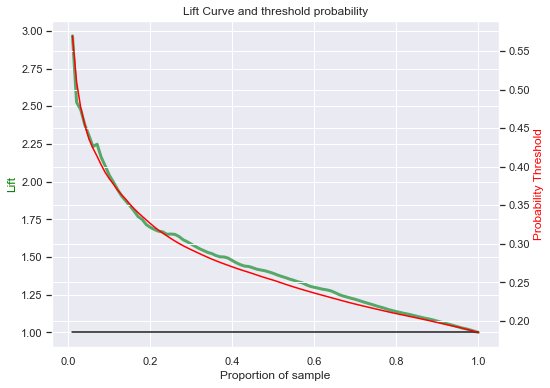

       positive_class_prob
count         47880.000000
mean              0.185081
std               0.090878
min               0.020449
25%               0.123029
50%               0.172154
75%               0.221051
max               0.737813
LIFT Curve clase 1 'atraso_15' en validation: 


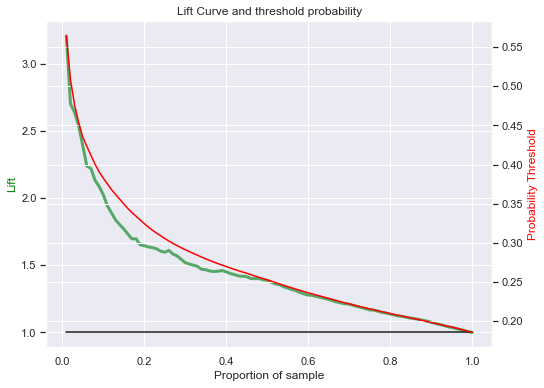

       positive_class_prob
count         13505.000000
mean              0.185352
std               0.089961
min               0.020449
25%               0.123029
50%               0.174665
75%               0.221051
max               0.737813
LIFT Curve clase 1 'atraso_15' en testing: 


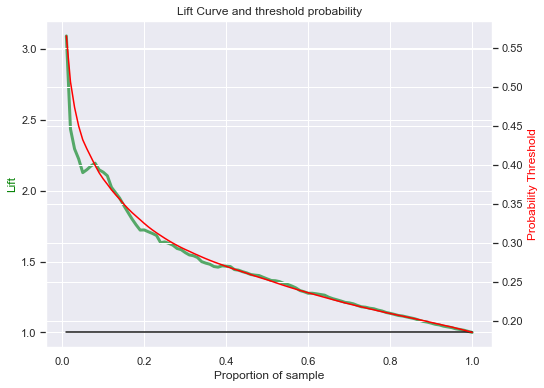

       positive_class_prob
count          6821.000000
mean              0.184840
std               0.090324
min               0.020449
25%               0.123029
50%               0.172154
75%               0.221051
max               0.737813


In [58]:
#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred_prob[:,1])

In [59]:
#Evaluando performance sobre corte 1er decil lift
#Realizando "mapping" de probabilidades
y_train_lift = [1 if y_train_pred_prob[x, 1] > 0.4 else 0 for x in range(len(y_train_pred_prob))]
y_val_lift = [1 if y_val_pred_prob[x, 1] > 0.4 else 0 for x in range(len(y_val_pred_prob))]
y_test_lift = [1 if y_test_pred_prob[x, 1] > 0.4 else 0 for x in range(len(y_test_pred_prob))]

In [60]:
#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_lift))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_lift))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_lift))

Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     39019
           1       0.46      0.08      0.13      8861

    accuracy                           0.81     47880
   macro avg       0.64      0.53      0.51     47880
weighted avg       0.76      0.81      0.75     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     10999
           1       0.49      0.08      0.14      2506

    accuracy                           0.81     13505
   macro avg       0.66      0.53      0.52     13505
weighted avg       0.76      0.81      0.76     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      5574
           1       0.42      0.07      0.12      1247

    accuracy                           0.81      6821
   macr


### Comentarios:

- El performance del modelo en si con este conjunto de datos y variables en mi opinion no tiene el resultado necesario para realizar un despliegue en productivo.
- La precision sobre la clase de interes (retraso) es de un 55% con un recall o sensibilidad del 3% (es capaz de detectar el 3% de los datos).
- Mirando F1 score que combina ambas metricas (precision y recall) el performance es de 48% (peor que una moneda) por lo que un modelo dummy (ej. decir que todos son 0) performaria mejor.
- No se percibe overfitting.
- Dado el performance del modelo, se recomienda utilizar otras variables como condiciones meteorologicas, comportamientos ultimos x meses de aerolineas, destinos, etc.
- Dado el desafío para este modelo entrenado por Juan, se recomienda utilizar un threshold de 0.4 para definir si el vuelo se atrasara o no segun estudio utilizando Lift Curve. (generalmente se usa para otro tipo de iniciativas pero en este caso podemos ajustar la probabilidad optima para estas condiciones.)
- Otra manera de optimizar el corte de probabilidad es utilizando precision-recall curve.

#### Utilizando XGBoost

In [61]:
import xgboost as xgb
from xgboost import plot_importance

In [62]:
#Split data 33% testing para reproducir el ejercicio de Juan
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)
#Entrenamiento de XGBOOST
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [ ]:
#Entrenamiento de XGBOOST
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [63]:
#Predicciones sobre testing
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [64]:
#Confusion matrix en testing
confusion_matrix(y_test, y_predxgb)

array([[18359,    44],
       [ 4017,    88]])

In [65]:
#reporte de clasificacion en testing
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost dejando Features más importantes 

In [66]:
modelxgb.feature_importances_

array([0.01000503, 0.03812765, 0.07740478, 0.        , 0.        ,
       0.0532625 , 0.        , 0.        , 0.        , 0.11452045,
       0.        , 0.05899748, 0.00510735, 0.        , 0.00056586,
       0.        , 0.        , 0.0343819 , 0.        , 0.00872515,
       0.06874514, 0.03494435, 0.02305366, 0.17575087, 0.        ,
       0.01610018, 0.00777404, 0.0238743 , 0.00835021, 0.01279222,
       0.01183943, 0.06969909, 0.00991499, 0.01740216, 0.03937674,
       0.02739281, 0.05189165], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 936x720 with 0 Axes>

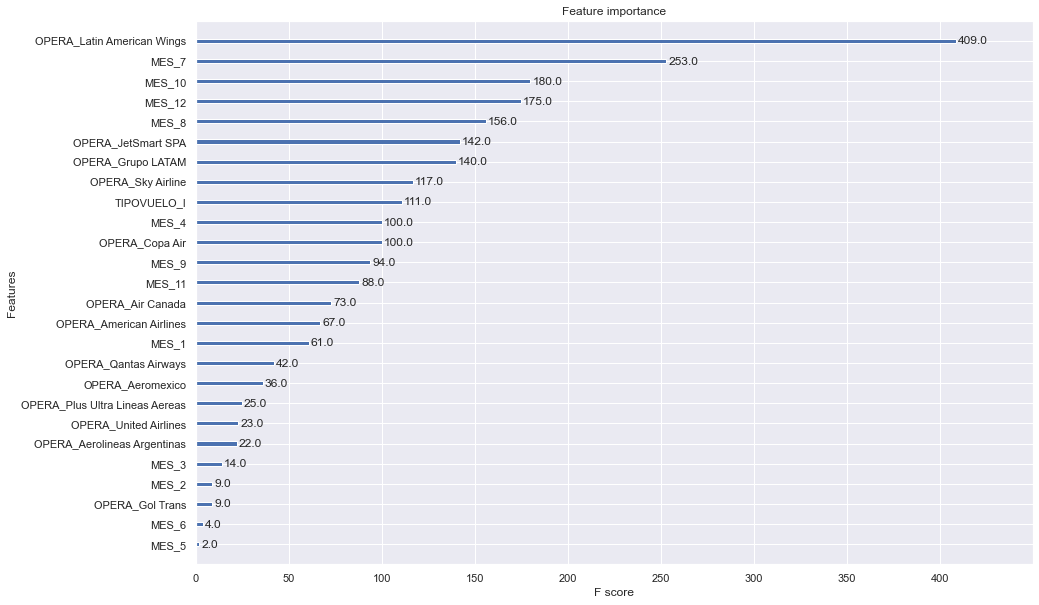

In [67]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

In [68]:
#Selecciona variables de acuerdo a feature importance (Esto podria mejorar utilizando un corte de manera automatica)
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]
labels_ = label

In [69]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [70]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb = modelxgb.fit(x_train2, y_train2)

In [71]:
y_predxgb = modelxgb.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [72]:
confusion_matrix(y_test2, y_predxgb)

array([[18371,    32],
       [ 4044,    61]])

In [73]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_GridCV = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [76]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)

In [77]:
confusion_matrix(y_test, y_predxgb_grid)

array([[18287,   116],
       [ 3933,   172]])

### Upsampling

In [78]:
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [79]:
#Resample
from sklearn.utils import resample

data_no_retraso = data[data['atraso_15'] == 0]
data_atraso = data[data['atraso_15'] == 1]

data_atraso_upsampled = resample(data_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [80]:
data_upsampled['atraso_15'].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [81]:
features_upsampled = pd.concat([pd.get_dummies(data_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_upsampled['atraso_15']

In [82]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [83]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [84]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)

In [85]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]])

In [86]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

In [87]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.

### Mejoras al modelo (rapidas)

In [88]:
# Copiando df para mantener linaje
df2 = df.copy()

In [89]:
# Vista de los datos
df2.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [108]:
# Agregando algunas columnas trabajadas
cols = [tasas_destinos, tasas_aerolineas, tasas_meses, tasas_dias, tasas_temporada, tipo_vuelo, tasa_periododia]
for col in cols:
    col.rename(columns={col.columns[1]:f'historical_delay_ratio_{col.columns[0]}'}, inplace=True)
    df2 = df2.merge(col, how='left', on=col.columns[0])
df2.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,dif_min,atraso_15,periodo_dia,historical_delay_ratio_SIGLADES,historical_delay_ratio_OPERA,historical_delay_ratio_MES,historical_delay_ratio_DIANOM,historical_delay_ratio_temporada_alta,historical_delay_ratio_TIPOVUELO,historical_delay_ratio_periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,3.0,0,noche,0.190945,0.067371,0.160118,0.161086,0.196759,0.225608,0.19925
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,9.0,0,noche,0.190945,0.067371,0.160118,0.202152,0.196759,0.225608,0.19925
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,9.0,0,noche,0.190945,0.067371,0.160118,0.169116,0.196759,0.225608,0.19925
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,3.0,0,noche,0.190945,0.067371,0.160118,0.170850,0.196759,0.225608,0.19925
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,-2.0,0,noche,0.190945,0.067371,0.160118,0.199493,0.196759,0.225608,0.19925


In [109]:
# Agregando comportamiento ultimos 3, 6 y 12 meses
from datetime import datetime, timedelta
def calculate_frequency(df, column_name, delay_column_name, date_column_name, freq_months=[1, 3, 6, 12]):
    """
    Calculate the frequency of delays for a given column in the last 3, 6, and 12 months.
    :param df: The input DataFrame.
    :param column_name: The column to obtain the frequency.
    :param delay_column_name: The class with 1 and 0.
    :param date_column_name: The column containing the date information.
    :param freq_months: A list of integers representing the frequency in months to consider.
    :return: A DataFrame containing the frequency of delays for each column in the last 3, 6, and 12 months.
    """
    # Find the maximum date in the date column
    df[date_column_name] = pd.to_datetime(df[date_column_name])
    max_date = df[date_column_name].max()
    min_date = df[date_column_name].min()
    
    print('Fecha maxima: ', max_date)
    print('Fecha minima: ', min_date)

    # Create a DataFrame to store the frequency of delays
    frequency_df = pd.DataFrame(columns=[column_name, 'Frequency', 'Last Months'])

    # Loop through the list of frequency months
    for freq in freq_months:
        # Calculate the start and end dates for the last `freq` months
        end_date = max_date
        start_date = end_date - timedelta(days=freq*30)

        # Filter the DataFrame to include only rows within the date range
        filtered_df = df[(df[date_column_name] >= start_date) & (df[date_column_name] <= end_date)]

        # Group the filtered DataFrame by the given column and calculate the frequency of delays for each group
        grouped_df = filtered_df.groupby(column_name)[delay_column_name].value_counts(normalize=True)

        # Convert the grouped DataFrame to a dictionary and store the results in the frequency DataFrame
        freq_dict = pd.DataFrame(grouped_df)
        freq_dict = freq_dict.rename(columns={delay_column_name: 'Frequency'}).reset_index()
        freq_dict = freq_dict[freq_dict[delay_column_name] == 1]
        freq_dict = freq_dict[[column_name, 'Frequency']]
        freq_dict['Last Months'] = f'Last {freq} Months'
        frequency_df = pd.concat([frequency_df, freq_dict], ignore_index=True)

    # Plot the frequency of delays for each column and frequency month
    plt.figure(figsize=(20, 5))
    sns.set(style="darkgrid")
    sns.barplot(x=column_name, y='Frequency', hue='Last Months', data=frequency_df, alpha=0.75)
    plt.title(f'Frequency of Delays by {column_name}')
    plt.ylabel('Frequency [%]', fontsize=12)
    plt.xlabel(column_name, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

    return frequency_df

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


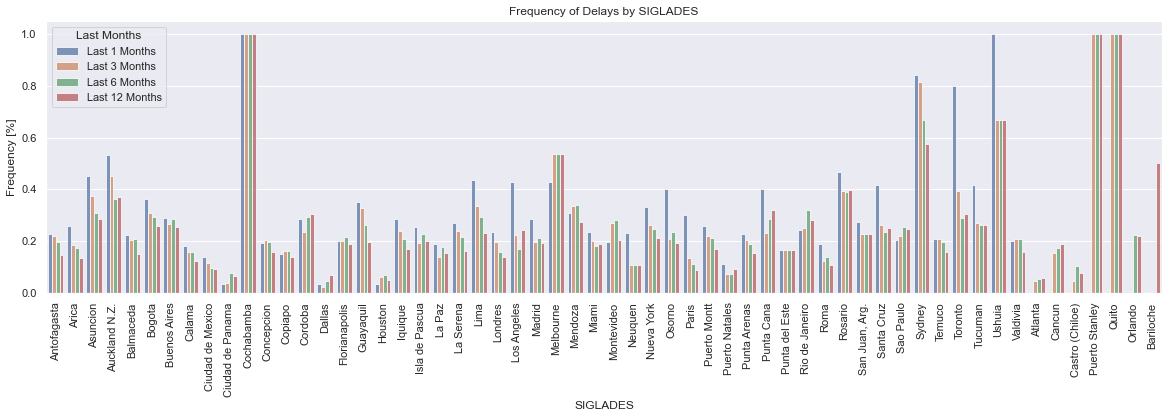

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


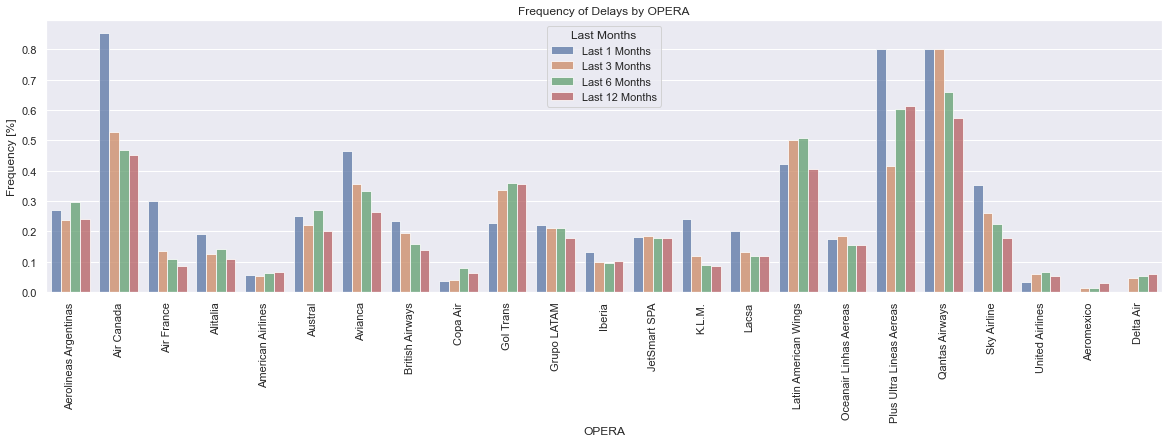

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


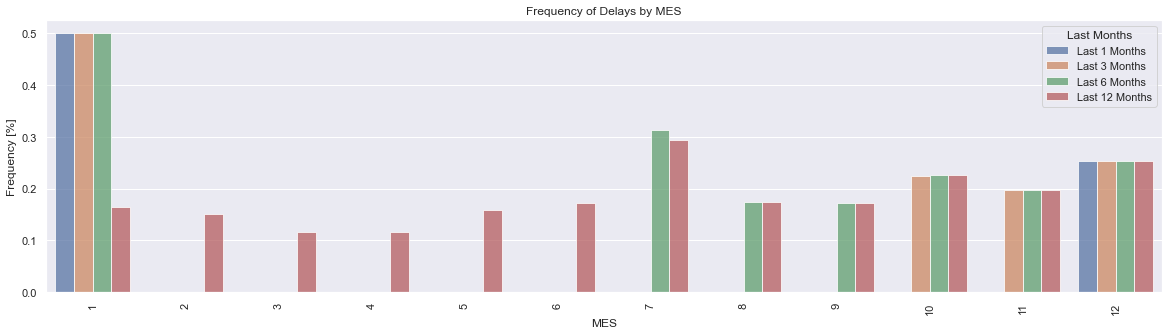

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


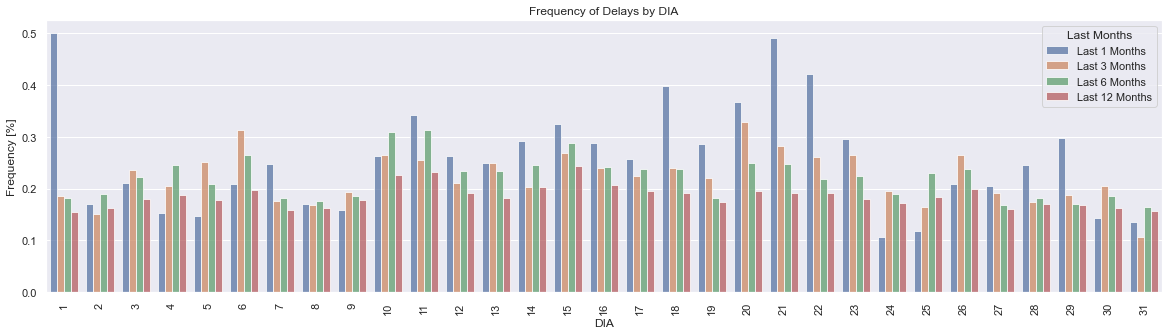

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


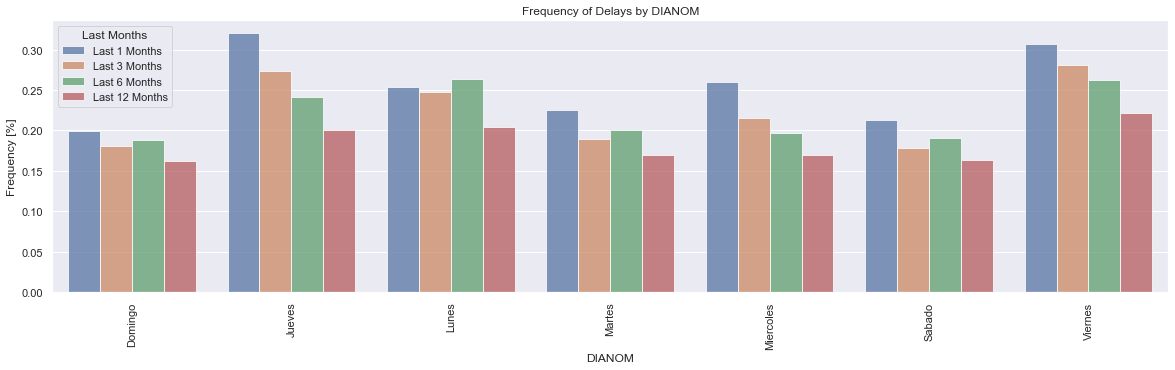

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


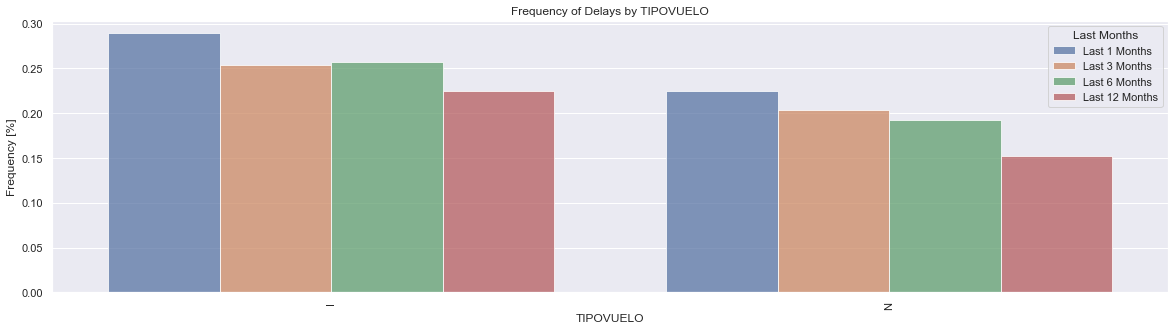

Fecha maxima:  2017-12-31 23:55:00
Fecha minima:  2017-01-01 00:15:00


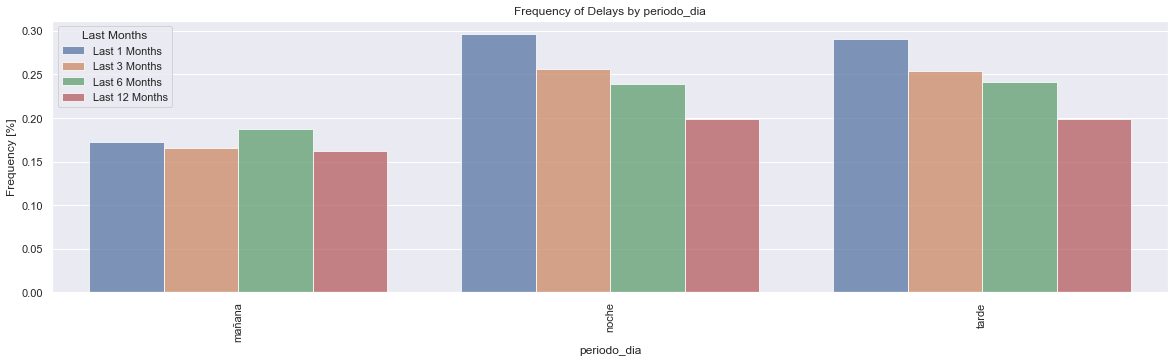

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,Last 1 Months_delay_ratio_MES,Last 3 Months_delay_ratio_MES,Last 1 Months_delay_ratio_DIA,Last 3 Months_delay_ratio_DIA,Last 1 Months_delay_ratio_DIANOM,Last 3 Months_delay_ratio_DIANOM,Last 1 Months_delay_ratio_TIPOVUELO,Last 3 Months_delay_ratio_TIPOVUELO,Last 1 Months_delay_ratio_periodo_dia,Last 3 Months_delay_ratio_periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,0.5,0.5,0.500000,0.185819,0.198770,0.180425,0.289086,0.254135,0.296875,0.256393
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,0.5,0.5,0.170455,0.151671,0.254417,0.248016,0.289086,0.254135,0.296875,0.256393
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,0.5,0.5,0.211538,0.236453,0.225728,0.188940,0.289086,0.254135,0.296875,0.256393
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,0.5,0.5,0.152778,0.204225,0.259516,0.215042,0.289086,0.254135,0.296875,0.256393
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,0.5,0.5,0.146341,0.250415,0.320410,0.273446,0.289086,0.254135,0.296875,0.256393


In [110]:
# Agregando otras columnas trabajadas
cols = ['SIGLADES', 'OPERA', 'MES', 'DIA', 'DIANOM', 'TIPOVUELO', 'periodo_dia']
periods = ['Last 1 Months','Last 3 Months']
for col in cols:
    
    response = calculate_frequency(df2, col, 'atraso_15', 'Fecha-I')
    for period in periods: #Dado las fechas en el dataset, usaremos 1 y 3 ultimos meses

        filtered_response = response[response['Last Months']==period]
        filtered_response = filtered_response.drop(columns=['Last Months'])
        filtered_response.rename(columns={filtered_response.columns[1] : f'{period}_delay_ratio_{filtered_response.columns[0]}'}, inplace=True)
        df2 = df2.merge(filtered_response, how='left', on=filtered_response.columns[0])

df2.head() 

In [111]:
df2.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'historical_delay_ratio_SIGLADES',
       'historical_delay_ratio_OPERA', 'historical_delay_ratio_MES',
       'historical_delay_ratio_DIANOM',
       'historical_delay_ratio_temporada_alta',
       'historical_delay_ratio_TIPOVUELO',
       'historical_delay_ratio_periodo_dia',
       'Last 1 Months_delay_ratio_SIGLADES',
       'Last 3 Months_delay_ratio_SIGLADES', 'Last 1 Months_delay_ratio_OPERA',
       'Last 3 Months_delay_ratio_OPERA', 'Last 1 Months_delay_ratio_MES',
       'Last 3 Months_delay_ratio_MES', 'Last 1 Months_delay_ratio_DIA',
       'Last 3 Months_delay_ratio_DIA', 'Last 1 Months_delay_ratio_DIANOM',
       'Last 3 Months_delay_ratio_DIANOM',
       'Last 1 Months_delay_ratio_TIPOVUELO',
       'Last 3 Months_dela

In [112]:
selected_cols = ['MES', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLADES', 'temporada_alta', 
       'atraso_15', 'periodo_dia', 'historical_delay_ratio_SIGLADES',
       'historical_delay_ratio_OPERA', 'historical_delay_ratio_MES',
       'historical_delay_ratio_DIANOM',
       'historical_delay_ratio_temporada_alta',
       'historical_delay_ratio_TIPOVUELO',
       'historical_delay_ratio_periodo_dia',
       'Last 1 Months_delay_ratio_SIGLADES',
       'Last 3 Months_delay_ratio_SIGLADES', 'Last 1 Months_delay_ratio_OPERA',
       'Last 3 Months_delay_ratio_OPERA', 'Last 1 Months_delay_ratio_MES',
       'Last 3 Months_delay_ratio_MES', 'Last 1 Months_delay_ratio_DIA',
       'Last 3 Months_delay_ratio_DIA', 'Last 1 Months_delay_ratio_DIANOM',
       'Last 3 Months_delay_ratio_DIANOM',
       'Last 1 Months_delay_ratio_TIPOVUELO',
       'Last 3 Months_delay_ratio_TIPOVUELO',
       'Last 1 Months_delay_ratio_periodo_dia',
       'Last 3 Months_delay_ratio_periodo_dia']
df3 = df2[selected_cols]

In [113]:
def create_dummies(df):
    '''
    This function automatically detects the categorical columns in a dataframe and creates dummy variables for them.
    The dummy variables are added to the dataframe as new columns.
    
    Parameters:
    df (pandas.DataFrame): The dataframe to be processed.
    
    Returns:
    pandas.DataFrame: The original dataframe with the dummy variables added as new columns.
    '''
    # Get the list of categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Create dummy variables for each categorical column
    dummy_columns = []
    for column in cat_columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        dummy_columns.extend(dummies.columns.tolist())
    
    # Remove the original categorical columns
    df = df.drop(cat_columns, axis=1)
        
    return df

In [123]:
df4 = create_dummies(df3)
df4

,temporada_alta,atraso_15,historical_delay_ratio_SIGLADES,historical_delay_ratio_OPERA,historical_delay_ratio_MES,historical_delay_ratio_DIANOM,historical_delay_ratio_temporada_alta,historical_delay_ratio_TIPOVUELO,historical_delay_ratio_periodo_dia,Last 1 Months_delay_ratio_SIGLADES,...,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,0,0.190945,0.067371,0.160118,0.161086,0.196759,0.225608,0.199250,0.234043,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0.190945,0.067371,0.160118,0.202152,0.196759,0.225608,0.199250,0.234043,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0.190945,0.067371,0.160118,0.169116,0.196759,0.225608,0.199250,0.234043,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0.190945,0.067371,0.160118,0.170850,0.196759,0.225608,0.199250,0.234043,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.190945,0.067371,0.160118,0.199493,0.196759,0.225608,0.199250,0.234043,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,1,0.230361,0.178995,0.254091,0.222017,0.196759,0.225608,0.197525,0.436490,...,0,0,0,0,0,0,0,0,0,1
68202,1,1,0.230361,0.178995,0.254091,0.202152,0.196759,0.225608,0.197525,0.436490,...,0,0,0,0,0,0,0,0,0,1
68203,1,1,0.230361,0.178995,0.254091,0.170850,0.196759,0.225608,0.197525,0.436490,...,0,0,0,0,0,0,0,0,0,1
68204,1,0,0.230361,0.178995,0.254091,0.222017,0.196759,0.225608,0.197525,0.436490,...,0,0,0,0,0,0,0,0,0,1


In [129]:
def remove_highly_correlated_columns(df, threshold=0.8):
    '''
    This function calculates the correlation between the columns of a pandas DataFrame
    and removes the columns with a correlation greater than the specified threshold.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to be processed.
    threshold (float): The correlation threshold above which to remove the columns. The default value is 0.8.
    
    Returns:
    pandas.DataFrame: The DataFrame with highly correlated columns removed.
    '''
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Heatmap')
    plt.show();

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the highly correlated columns
    df = df.drop(columns=to_drop)

    #Plot after removing
    corr_matrix = df.corr().abs()
    plt.figure(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Heatmap')
    plt.show();

    return df

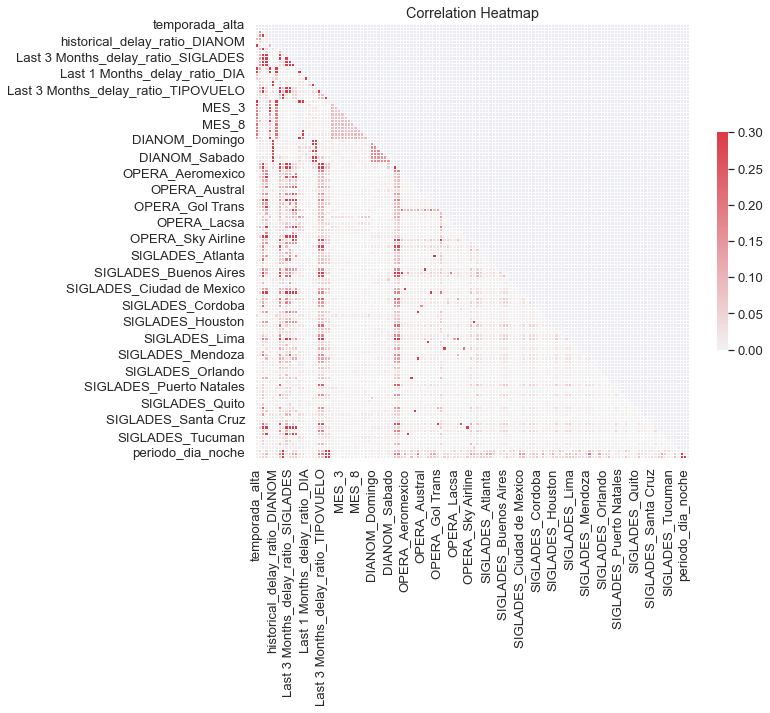

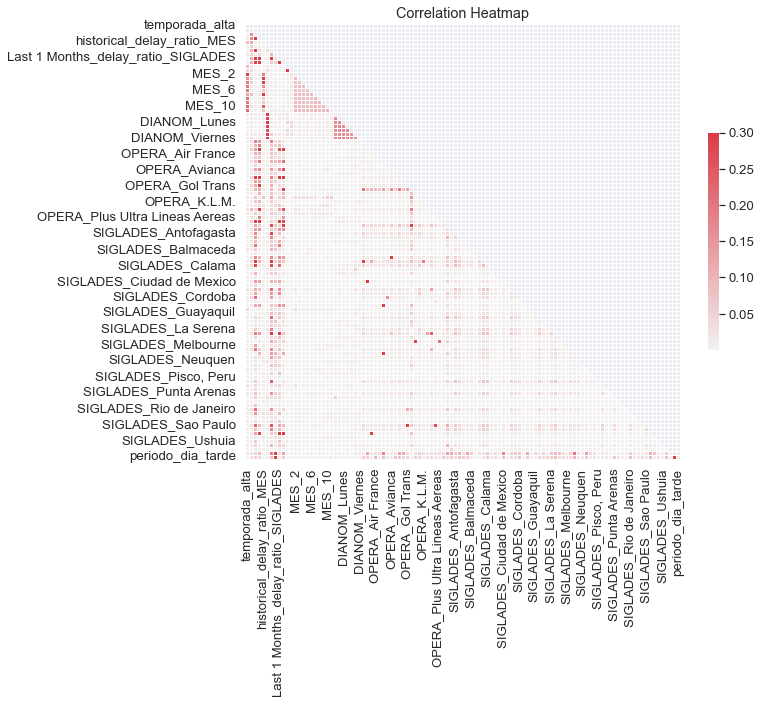

In [146]:
#Eliminando correlaciones
df5 = remove_highly_correlated_columns(df4)

In [131]:
#Eliminando features poco importantes
def remove_least_important_features(df, target_col, C=1.0):
    '''
    This function performs logistic regression using Lasso regularization to select the important features,
    and then returns a new DataFrame without the least important features.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to be processed.
    target_col (str): The name of the target column.
    C (float): Inverse of regularization strength. Smaller values specify stronger regularization. Defaults to 1.0.
    
    Returns:
    pandas.DataFrame: The DataFrame without the least important features.
    '''
    # Split the dataframe into features (X) and target (y)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Fit the logistic regression model with L1 regularization (lasso)
    lasso = LogisticRegression(penalty='l1', solver='liblinear', C=C, random_state=42)
    lasso.fit(X, y)

    # Get the coefficients of the model and sort them by absolute value
    coef = pd.DataFrame({'feature': X.columns, 'coef': abs(lasso.coef_[0])})
    coef = coef.sort_values(by='coef', ascending=False)

    # Remove the least important features
    least_important_features = coef[coef['coef'] == 0]['feature']
    df_cleaned = df.drop(columns=least_important_features)

    return df_cleaned

In [147]:
#Detecting nan values
cols_with_nan = df5.columns[df5.isnull().any()].tolist()
cols_with_nan

['historical_delay_ratio_SIGLADES',
 'historical_delay_ratio_periodo_dia',
 'Last 1 Months_delay_ratio_SIGLADES',
 'Last 1 Months_delay_ratio_OPERA']

In [148]:
#Dado lo anterior, si no hay cruce es porque el ratio es 0%
for col in cols_with_nan:
    df5[col] = df5[col].fillna(float(0))


In [150]:
#Detectar nuevametne para comprobar que no existan nan values
cols_with_nan = df5.columns[df5.isnull().any()].tolist()
cols_with_nan

[]

In [155]:
df6 = remove_least_important_features(df5, 'atraso_15')
df6

,temporada_alta,atraso_15,historical_delay_ratio_SIGLADES,historical_delay_ratio_OPERA,historical_delay_ratio_MES,historical_delay_ratio_periodo_dia,Last 1 Months_delay_ratio_OPERA,Last 1 Months_delay_ratio_DIA,Last 3 Months_delay_ratio_DIA,MES_2,...,SIGLADES_Punta Cana,SIGLADES_Rio de Janeiro,SIGLADES_Rosario,SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Valdivia,periodo_dia_noche,periodo_dia_tarde
0,1,0,0.190945,0.067371,0.160118,0.199250,0.054795,0.500000,0.185819,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0.190945,0.067371,0.160118,0.199250,0.054795,0.170455,0.151671,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0.190945,0.067371,0.160118,0.199250,0.054795,0.211538,0.236453,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0.190945,0.067371,0.160118,0.199250,0.054795,0.152778,0.204225,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.190945,0.067371,0.160118,0.199250,0.054795,0.146341,0.250415,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.421739,0.260530,0,...,0,0,0,0,0,0,0,0,0,1
68202,1,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.118227,0.165232,0,...,0,0,0,0,0,0,0,0,0,1
68203,1,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.205607,0.191935,0,...,0,0,0,0,0,0,0,0,0,1
68204,1,0,0.230361,0.178995,0.254091,0.197525,0.180380,0.296804,0.187200,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
#Excluyendo label del dataset
label = df6.pop('atraso_15')
label

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int64

In [157]:
features = df6.copy()
features

,temporada_alta,historical_delay_ratio_SIGLADES,historical_delay_ratio_OPERA,historical_delay_ratio_MES,historical_delay_ratio_periodo_dia,Last 1 Months_delay_ratio_OPERA,Last 1 Months_delay_ratio_DIA,Last 3 Months_delay_ratio_DIA,MES_2,MES_3,...,SIGLADES_Punta Cana,SIGLADES_Rio de Janeiro,SIGLADES_Rosario,SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Valdivia,periodo_dia_noche,periodo_dia_tarde
0,1,0.190945,0.067371,0.160118,0.199250,0.054795,0.500000,0.185819,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0.190945,0.067371,0.160118,0.199250,0.054795,0.170455,0.151671,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0.190945,0.067371,0.160118,0.199250,0.054795,0.211538,0.236453,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.190945,0.067371,0.160118,0.199250,0.054795,0.152778,0.204225,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0.190945,0.067371,0.160118,0.199250,0.054795,0.146341,0.250415,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.421739,0.260530,0,0,...,0,0,0,0,0,0,0,0,0,1
68202,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.118227,0.165232,0,0,...,0,0,0,0,0,0,0,0,0,1
68203,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.205607,0.191935,0,0,...,0,0,0,0,0,0,0,0,0,1
68204,1,0.230361,0.178995,0.254091,0.197525,0.180380,0.296804,0.187200,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
#Utilizar validation set para comprobar performance
#Split data 33% testing
X_trainval, X_test, y_trainval, y_test = train_test_split(features, label, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.22, random_state=42)

#shapes de los conjuntos creados
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (47880, 81) (47880,)
Validation set shape: (13505, 81) (13505,)
Testing set shape: (6821, 81) (6821,)


Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     39014
           1       0.57      0.05      0.09      8866

    accuracy                           0.82     47880
   macro avg       0.70      0.52      0.50     47880
weighted avg       0.77      0.82      0.75     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     11032
           1       0.50      0.04      0.07      2473

    accuracy                           0.82     13505
   macro avg       0.66      0.51      0.48     13505
weighted avg       0.76      0.82      0.75     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      5546
           1       0.60      0.04      0.08      1275

    accuracy                           0.82      6821
   macr

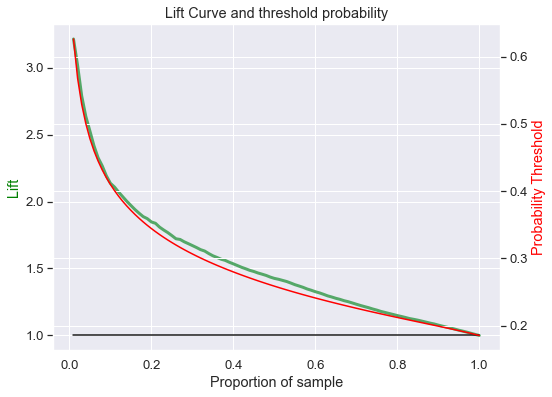

       positive_class_prob
count         47880.000000
mean              0.185230
std               0.101734
min               0.016472
25%               0.115955
50%               0.162828
75%               0.230308
max               0.830874
LIFT Curve clase 1 'atraso_15' en validation: 


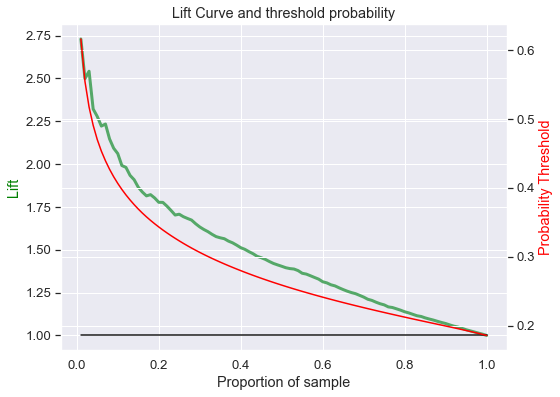

       positive_class_prob
count         13505.000000
mean              0.185540
std               0.100438
min               0.018544
25%               0.115815
50%               0.163484
75%               0.231355
max               0.784832
LIFT Curve clase 1 'atraso_15' en testing: 


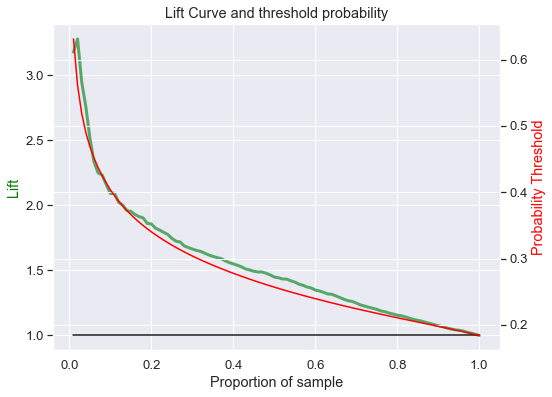

       positive_class_prob
count          6821.000000
mean              0.183981
std               0.100518
min               0.017519
25%               0.115524
50%               0.162294
75%               0.229850
max               0.786034


In [159]:
#entrenando Regresion Logistica para revisar si hubo mejora
model = logReg.fit(X_train, y_train)
#Prediciendo sobre set de testing
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Prediciendo nuevamente para obtener probabilidades
y_train_pred_prob = model.predict_proba(X_train)
y_val_pred_prob = model.predict_proba(X_val)
y_test_pred_prob = model.predict_proba(X_test)

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred_prob[:,1])

Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     39014
           1       0.67      0.06      0.11      8866

    accuracy                           0.82     47880
   macro avg       0.75      0.53      0.51     47880
weighted avg       0.79      0.82      0.75     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     11032
           1       0.57      0.05      0.10      2473

    accuracy                           0.82     13505
   macro avg       0.70      0.52      0.50     13505
weighted avg       0.78      0.82      0.75     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      5546
           1       0.66      0.06      0.10      1275

    accuracy                           0.82      6821
   macr

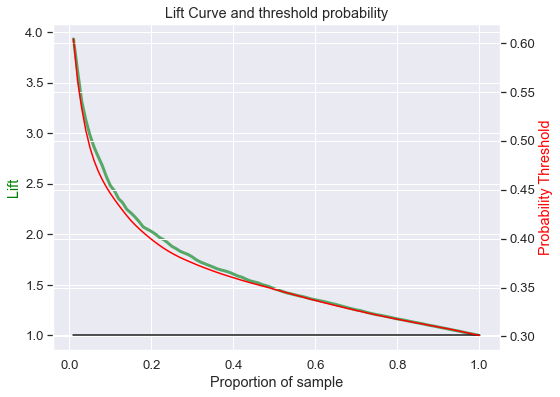

       positive_class_prob
count         47880.000000
mean              0.300948
std               0.065180
min               0.207460
25%               0.254038
50%               0.289811
75%               0.326425
max               0.676184
LIFT Curve clase 1 'atraso_15' en validation: 


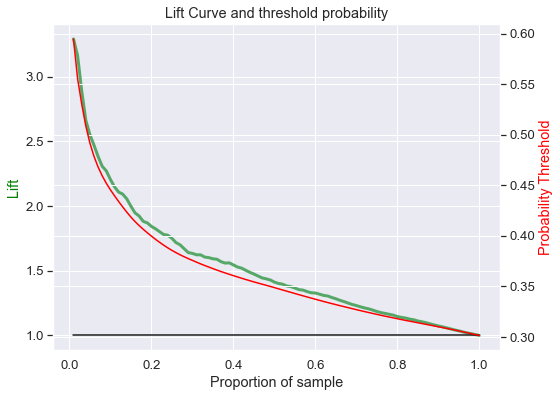

       positive_class_prob
count         13505.000000
mean              0.301476
std               0.064738
min               0.207460
25%               0.254493
50%               0.290565
75%               0.326425
max               0.667413
LIFT Curve clase 1 'atraso_15' en testing: 


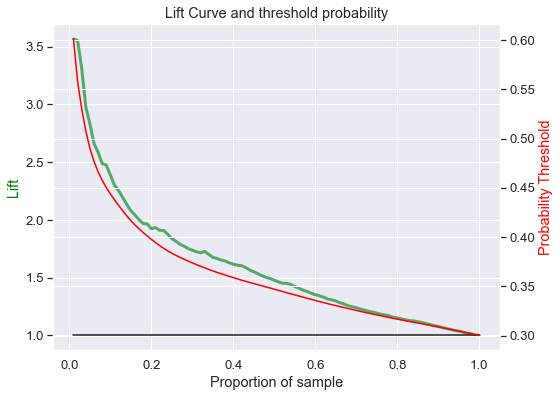

       positive_class_prob
count          6821.000000
mean              0.300145
std               0.064654
min               0.207460
25%               0.253965
50%               0.288455
75%               0.326425
max               0.670605


In [161]:
#entrenando XGBOOST para revisar si hubo mejora

modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(X_train, y_train)

#Prediciendo sobre set de testing
y_train_pred = modelxgb.predict(X_train)
y_val_pred = modelxgb.predict(X_val)
y_test_pred = modelxgb.predict(X_test)

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Prediciendo nuevamente para obtener probabilidades
y_train_pred_prob = modelxgb.predict_proba(X_train)
y_val_pred_prob = modelxgb.predict_proba(X_val)
y_test_pred_prob = modelxgb.predict_proba(X_test)

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred_prob[:,1])
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred_prob[:,1])

In [163]:
#Probamos LGBM
import lightgbm as lgb

In [164]:
#Configuracion de parametros (usuales)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 6
}

# Create the LGBM dataset
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8866, number of negative: 39014
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you ca

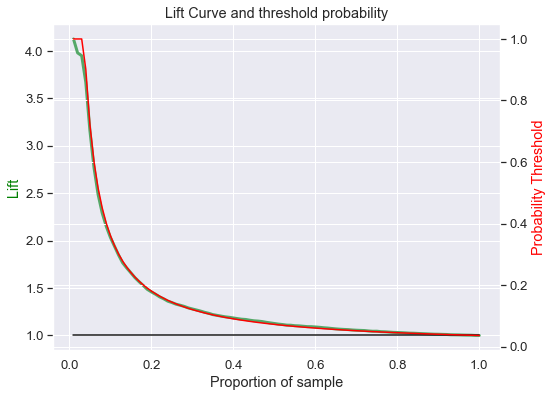

       positive_class_prob
count         47880.000000
mean              0.036090
std               0.186517
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en validation: 


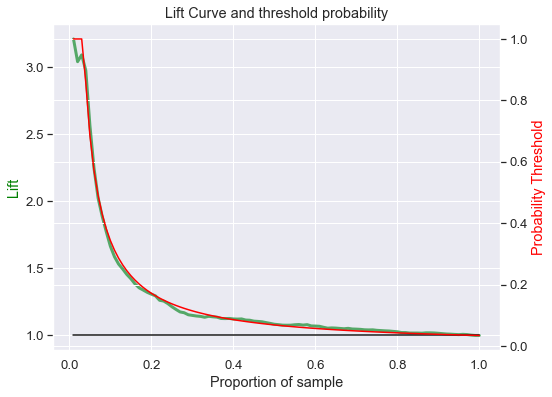

       positive_class_prob
count         13505.000000
mean              0.034358
std               0.182153
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en testing: 


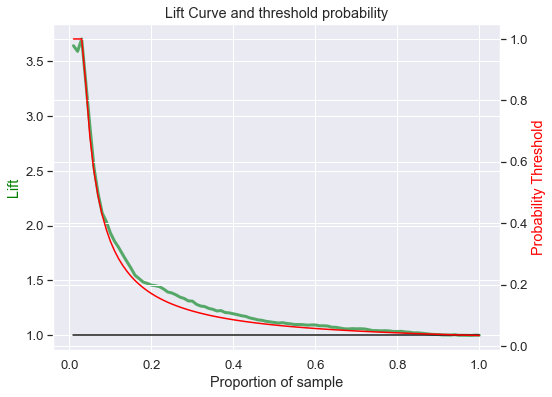

       positive_class_prob
count          6821.000000
mean              0.034159
std               0.181651
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


In [172]:
# Train the LGBM model
lbm_model = lgb.train(params, train_set, num_boost_round=1000, valid_sets=[train_set, val_set], early_stopping_rounds=10)

#Prediciendo sobre set de testing
y_train_pred = lbm_model.predict(X_train)
y_val_pred = lbm_model.predict(X_val)
y_test_pred = lbm_model.predict(X_test)

#Se debe hacer esto dado que LGB entrega probabilidad en 1D
y_train_pred = [1 if x > 0.5 else 0 for x in y_train_pred]
y_val_pred = [1 if x > 0.5 else 0 for x in y_val_pred]
y_test_pred = [1 if x > 0.5 else 0 for x in y_test_pred]

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred)
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred)
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred)

Training set shape: (47880, 37) (47880,)
Validation set shape: (13505, 37) (13505,)
Testing set shape: (6821, 37) (6821,)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8861, number of negative: 39019
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 47880, number of used features: 37
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (

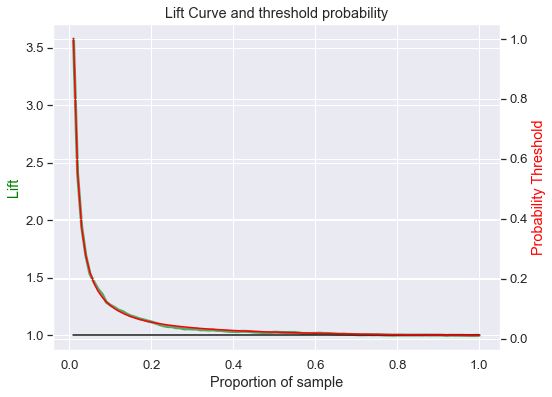

       positive_class_prob
count         47880.000000
mean              0.011111
std               0.104823
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en validation: 


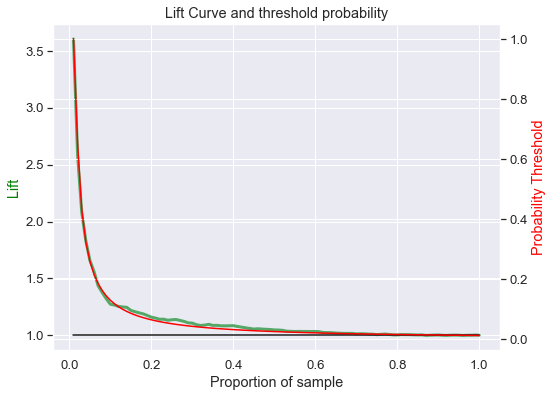

       positive_class_prob
count         13505.000000
mean              0.013032
std               0.113417
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en testing: 


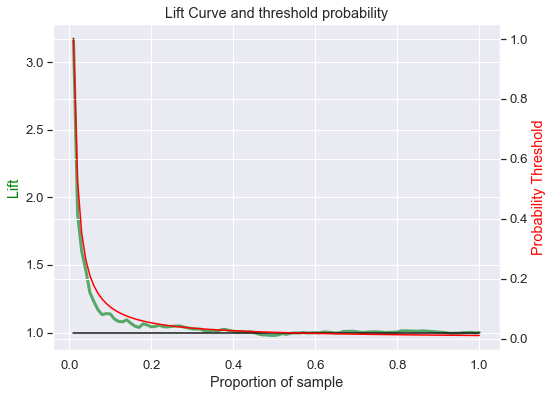

       positive_class_prob
count          6821.000000
mean              0.010556
std               0.102204
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


In [173]:
#Comparando con variables simples (para efectos de simplicidad en despliegue). Si iguala performance, desplegamos (no con el mejor resultado) el modelo mas simple.

# Filtra columnas que espera que tengan poder predictivo
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

#Encoding variables categoricas 
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

#Split data 33% testing
X_trainval, X_test, y_trainval, y_test = train_test_split(features, label, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.22, random_state=42)

#shapes de los conjuntos creados
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Create the LGBM dataset
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)


# Train the LGBM model
lbm_model = lgb.train(params, train_set, num_boost_round=1000, valid_sets=[train_set, val_set], early_stopping_rounds=10)

#Prediciendo sobre set de testing
y_train_pred = lbm_model.predict(X_train)
y_val_pred = lbm_model.predict(X_val)
y_test_pred = lbm_model.predict(X_test)

#Se debe hacer esto dado que LGB entrega probabilidad en 1D
y_train_pred = [1 if x > 0.5 else 0 for x in y_train_pred]
y_val_pred = [1 if x > 0.5 else 0 for x in y_val_pred]
y_test_pred = [1 if x > 0.5 else 0 for x in y_test_pred]

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred)
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred)
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred)

In [174]:
'''
///////// MODELO COMPLEJO//////

Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     39014
           1       0.73      0.14      0.24      8866

    accuracy                           0.83     47880
   macro avg       0.78      0.57      0.57     47880
weighted avg       0.82      0.83      0.78     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     11032
           1       0.59      0.11      0.19      2473

    accuracy                           0.82     13505
   macro avg       0.71      0.55      0.54     13505
weighted avg       0.79      0.82      0.77     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      5546
           1       0.69      0.13      0.21      1275

    accuracy                           0.83      6821
   macro avg       0.76      0.56      0.56      6821
weighted avg       0.80      0.83      0.77      6821

///////// MODELO SIMPLE//////


Reporte de clasificacion en training: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     39019
           1       0.67      0.04      0.08      8861

    accuracy                           0.82     47880
   macro avg       0.75      0.52      0.49     47880
weighted avg       0.79      0.82      0.75     47880

Reporte de clasificacion en validation: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     10999
           1       0.67      0.05      0.09      2506

    accuracy                           0.82     13505
   macro avg       0.75      0.52      0.49     13505
weighted avg       0.79      0.82      0.75     13505

Reporte de clasificacion en testing: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      5574
           1       0.57      0.03      0.06      1247

    accuracy                           0.82      6821
   macro avg       0.70      0.51      0.48      6821
weighted avg       0.78      0.82      0.75      6821
'''

'\n///////// MODELO COMPLEJO//////\n\nReporte de clasificacion en training: \n               precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91     39014\n           1       0.73      0.14      0.24      8866\n\n    accuracy                           0.83     47880\n   macro avg       0.78      0.57      0.57     47880\nweighted avg       0.82      0.83      0.78     47880\n\nReporte de clasificacion en validation: \n               precision    recall  f1-score   support\n\n           0       0.83      0.98      0.90     11032\n           1       0.59      0.11      0.19      2473\n\n    accuracy                           0.82     13505\n   macro avg       0.71      0.55      0.54     13505\nweighted avg       0.79      0.82      0.77     13505\n\nReporte de clasificacion en testing: \n               precision    recall  f1-score   support\n\n           0       0.83      0.99      0.90      5546\n           1       0.69      0.13      0.21      1275\

Dado que el modelo mejorado performa 16% mejor sin overfitting en F1 Score que el entrenado por Juan, continuaremos el despliegue con este.

Training set shape: (47880, 81) (47880,)
Validation set shape: (13505, 81) (13505,)
Testing set shape: (6821, 81) (6821,)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8866, number of negative: 39014
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 47880, number of used features: 81
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. 

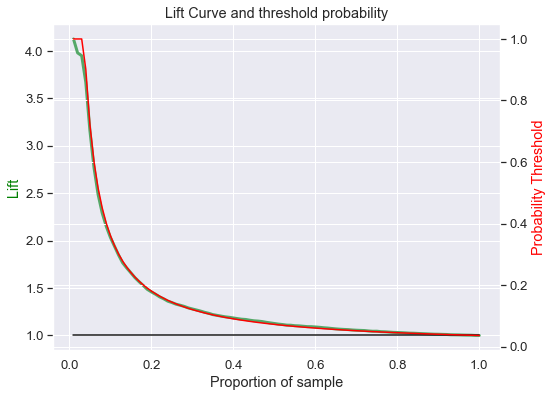

       positive_class_prob
count         47880.000000
mean              0.036090
std               0.186517
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en validation: 


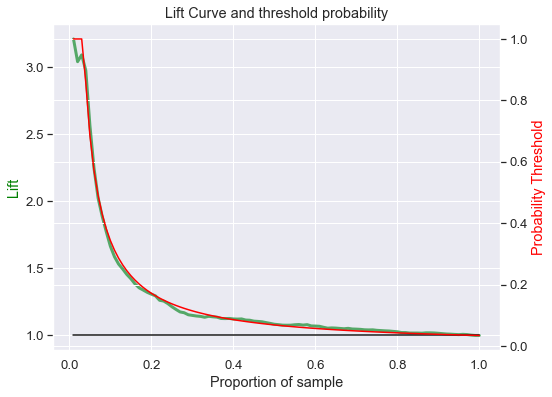

       positive_class_prob
count         13505.000000
mean              0.034358
std               0.182153
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en testing: 


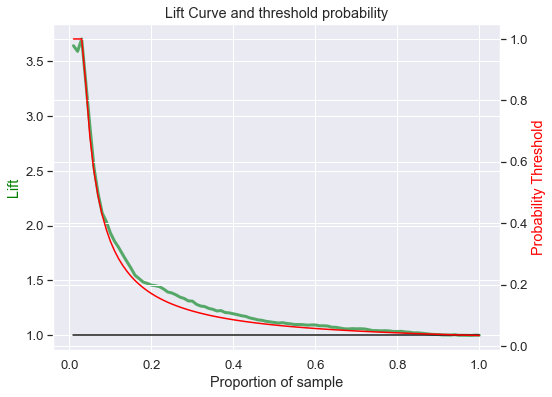

       positive_class_prob
count          6821.000000
mean              0.034159
std               0.181651
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


In [179]:
#Excluyendo label del dataset
df6 = remove_least_important_features(df5, 'atraso_15')
label = df6.pop('atraso_15')
label

features = df6.copy()
features

#Utilizar validation set para comprobar performance
#Split data 33% testing
X_trainval, X_test, y_trainval, y_test = train_test_split(features, label, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.22, random_state=42)

#shapes de los conjuntos creados
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

#Configuracion de parametros (usuales)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'max_depth': 6
}

# Create the LGBM dataset
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

# Train the LGBM model
lbm_final_model = lgb.train(params, train_set, num_boost_round=1000, valid_sets=[train_set, val_set], early_stopping_rounds=10)

#Prediciendo sobre set de testing
y_train_pred = lbm_final_model.predict(X_train)
y_val_pred = lbm_final_model.predict(X_val)
y_test_pred = lbm_final_model.predict(X_test)

#Se debe hacer esto dado que LGB entrega probabilidad en 1D
y_train_pred = [1 if x > 0.5 else 0 for x in y_train_pred]
y_val_pred = [1 if x > 0.5 else 0 for x in y_val_pred]
y_test_pred = [1 if x > 0.5 else 0 for x in y_test_pred]

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred)
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred)
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred)



In [180]:
#Optimizando el algoritmo
from sklearn.model_selection import GridSearchCV

In [197]:
# Definiendo parametros tipicos para encontrar el mejor rendimiento
params = {
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.5, 0.8, 1.0],
    'bagging_fraction': [0.5, 0.8, 1.0],
    'bagging_freq': [3, 5, 7],
    'max_depth': [3, 4, 5]
}

# Creacion del objeto GridSearch
grid_search = GridSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_grid=params,
    scoring='f1_macro',
    cv=5,
    verbose=3
)

In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, np.array(y_train))

In [200]:
# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'bagging_fraction': 0.8, 'bagging_freq': 3, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'metric': 'binary_logloss', 'num_leaves': 31, 'objective': 'binary'}
Best score:  0.5373560316429847


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8866, number of negative: 39014
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 47880, number of used features: 81
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary

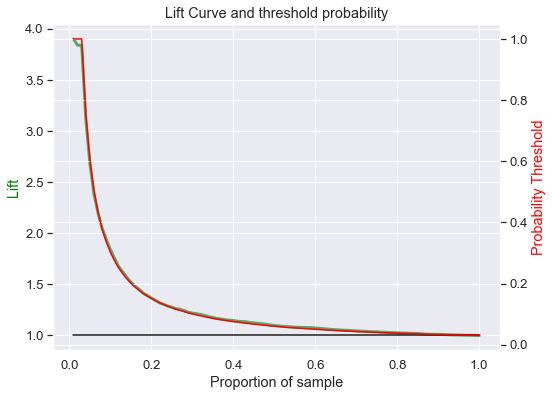

       positive_class_prob
count         47880.000000
mean              0.030263
std               0.171312
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en validation: 


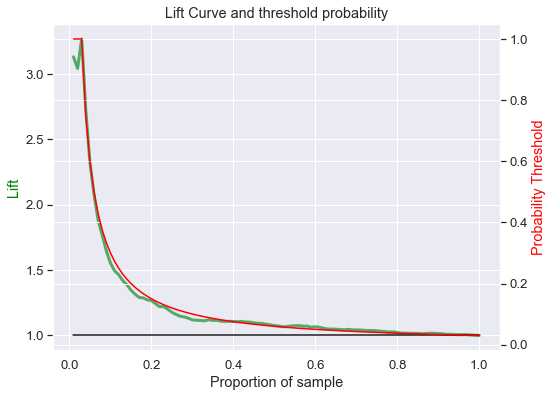

       positive_class_prob
count         13505.000000
mean              0.030063
std               0.170767
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en testing: 


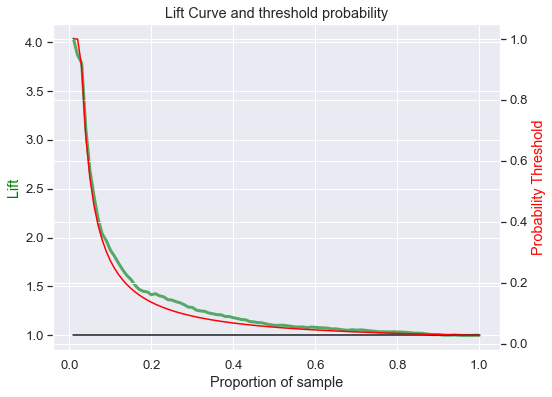

       positive_class_prob
count          6821.000000
mean              0.027269
std               0.162877
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


In [202]:
# Entrenando con mejores parametros
best_params = grid_search.best_params_

# Create the LGBM dataset
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

#Entrenando
tuned_lgb = lgb.train(best_params, train_set, num_boost_round=1000, valid_sets=[train_set, val_set], early_stopping_rounds=10)


#Prediciendo sobre set de testing
y_train_pred = tuned_lgb.predict(X_train)
y_val_pred = tuned_lgb.predict(X_val)
y_test_pred = tuned_lgb.predict(X_test)

#Se debe hacer esto dado que LGB entrega probabilidad en 1D
y_train_pred = [1 if x > 0.5 else 0 for x in y_train_pred]
y_val_pred = [1 if x > 0.5 else 0 for x in y_val_pred]
y_test_pred = [1 if x > 0.5 else 0 for x in y_test_pred]

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred)
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred)
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

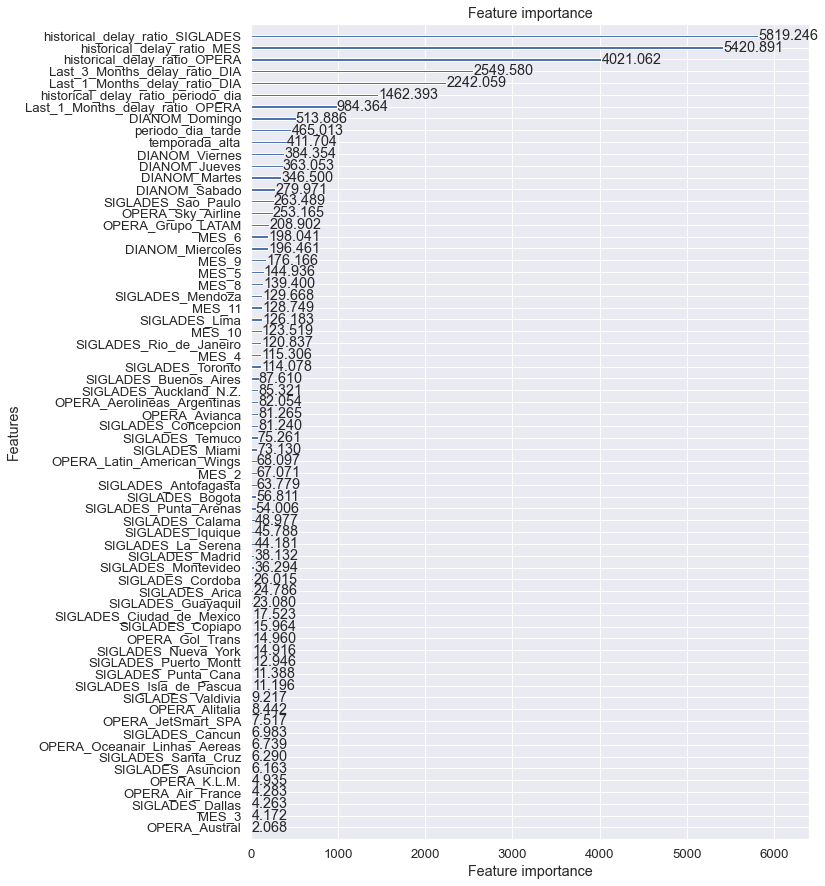

In [219]:
#Obteniendo feature importance para saber que variables usar en el despliegue
importance_scores = tuned_lgb.feature_importance()
#Graficar importancia
lgb.plot_importance(tuned_lgb, importance_type='gain', figsize=(10,15))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8866, number of negative: 39014
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 47880, number of used features: 7
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:

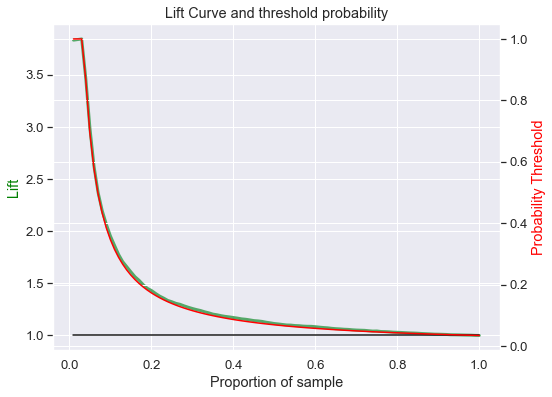

       positive_class_prob
count         47880.000000
mean              0.034670
std               0.182945
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en validation: 


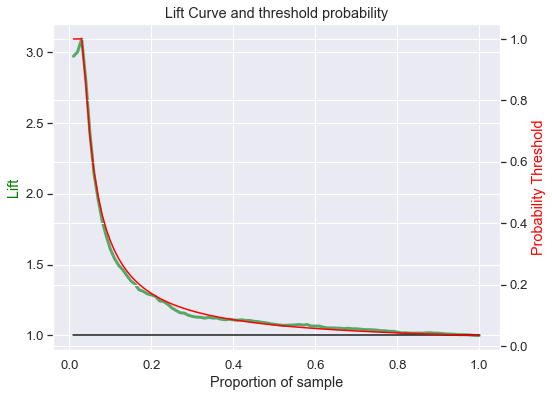

       positive_class_prob
count         13505.000000
mean              0.034210
std               0.181774
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000
LIFT Curve clase 1 'atraso_15' en testing: 


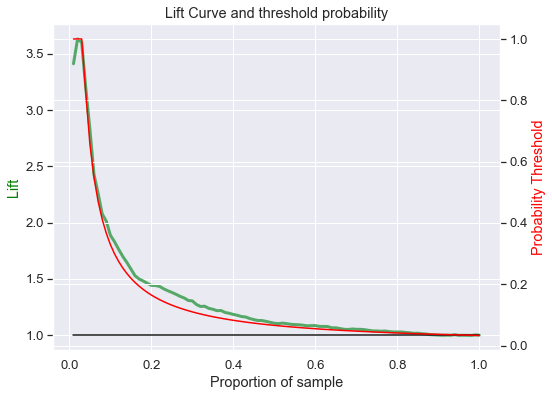

       positive_class_prob
count          6821.000000
mean              0.032986
std               0.178614
min               0.000000
25%               0.000000
50%               0.000000
75%               0.000000
max               1.000000


In [229]:
#Definir threshold para eliminar variables
threshold = 100
#Obtener index de variables que superan el threshold
important_features = np.where(importance_scores > threshold)[0]
important_features
#Eliminar columnas no importantes
X_train_filtered = X_train.iloc[:, important_features]
X_test_filtered = X_test.iloc[:, important_features]
X_val_filtered = X_val.iloc[:, important_features]

#Validar performance al eliminar features
filtered_train_set = lgb.Dataset(X_train_filtered, label=y_train)
filtered_val_set = lgb.Dataset(X_val_filtered, label=y_val)

#Entrenando
tuned_lgb = lgb.train(best_params, filtered_train_set, num_boost_round=1000, valid_sets=[filtered_train_set, filtered_val_set], early_stopping_rounds=10)

#Prediciendo sobre set de testing
y_train_pred = tuned_lgb.predict(X_train_filtered)
y_val_pred = tuned_lgb.predict(X_val_filtered)
y_test_pred = tuned_lgb.predict(X_test_filtered)

#Se debe hacer esto dado que LGB entrega probabilidad en 1D
y_train_pred = [1 if x > 0.5 else 0 for x in y_train_pred]
y_val_pred = [1 if x > 0.5 else 0 for x in y_val_pred]
y_test_pred = [1 if x > 0.5 else 0 for x in y_test_pred]

#Performance
print('Reporte de clasificacion en training: \n', classification_report(y_train, y_train_pred))
print('Reporte de clasificacion en validation: \n', classification_report(y_val, y_val_pred))
print('Reporte de clasificacion en testing: \n', classification_report(y_test, y_test_pred))

#Observando lift curve
print("LIFT Curve clase 1 'atraso_15' en training: ")
plot_Lift_curve(np.array(y_train), y_train_pred)
print("LIFT Curve clase 1 'atraso_15' en validation: ")
plot_Lift_curve(np.array(y_val), y_val_pred)
print("LIFT Curve clase 1 'atraso_15' en testing: ")
plot_Lift_curve(np.array(y_test), y_test_pred)


In [230]:
#Variables usadas para predecir
X_train_filtered.columns

Index(['historical_delay_ratio_SIGLADES', 'historical_delay_ratio_OPERA',
       'historical_delay_ratio_MES', 'historical_delay_ratio_periodo_dia',
       'Last 1 Months_delay_ratio_OPERA', 'Last 1 Months_delay_ratio_DIA',
       'Last 3 Months_delay_ratio_DIA'],
      dtype='object')

In [234]:
#Tipo de variables
X_train_filtered.dtypes

historical_delay_ratio_SIGLADES       float64
historical_delay_ratio_OPERA          float64
historical_delay_ratio_MES            float64
historical_delay_ratio_periodo_dia    float64
Last 1 Months_delay_ratio_OPERA       float64
Last 1 Months_delay_ratio_DIA         float64
Last 3 Months_delay_ratio_DIA         float64
dtype: object

In [235]:
# Guardar el modelo
tuned_lgb.save_model('../model/lgbm_model_late_flight_v1.txt')


In [236]:
import pickle
# Usando pickle
with open('../model/lgbm_model_late_flight_v1.pkl', 'wb') as file:
    pickle.dump(tuned_lgb, file)